<a href="https://colab.research.google.com/github/Lettygee/Exploratory-Data-Analysis-Machine-learning/blob/main/EDA_and_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns

In [106]:
data = pd.read_csv('Medical_insurance_dataset.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [108]:
data.describe()

,User ID,Age,EstimatedSalary
count,4.000000e+02,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000
std,7.165832e+04,10.482877,34096.960282
min,1.556669e+07,18.000000,15000.000000
25%,1.562676e+07,29.750000,43000.000000
50%,1.569434e+07,37.000000,70000.000000
75%,1.575036e+07,46.000000,88000.000000
max,1.581524e+07,60.000000,150000.000000


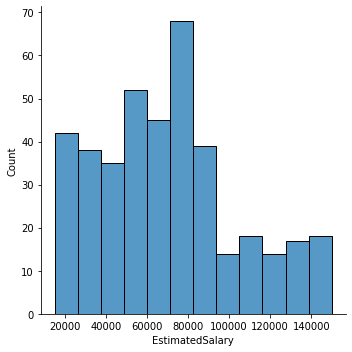

In [109]:
sns.displot(data['EstimatedSalary']);

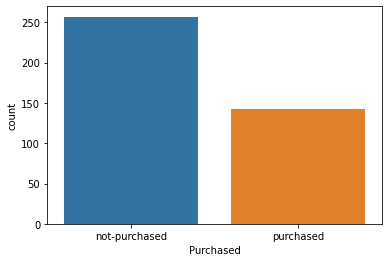

In [110]:
sns.countplot(x='Purchased', data =data);

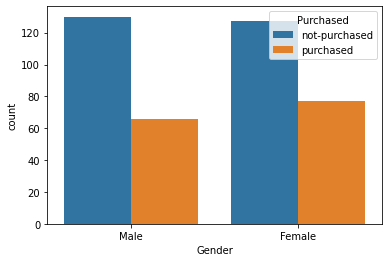

In [111]:
sns.countplot(x='Gender', hue='Purchased', data=data);

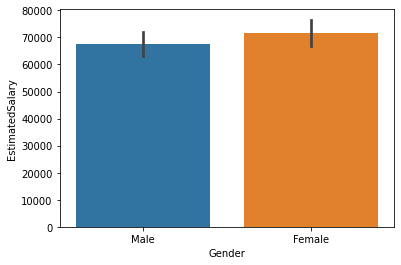

In [112]:
sns.barplot(x='Gender', y='EstimatedSalary', data=data);

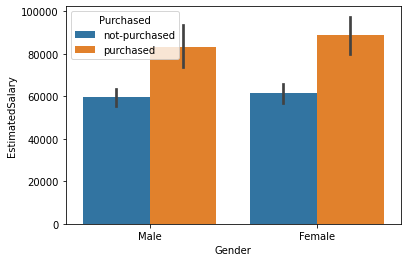

In [113]:
sns.barplot(x='Gender', y='EstimatedSalary',hue='Purchased', data=data);

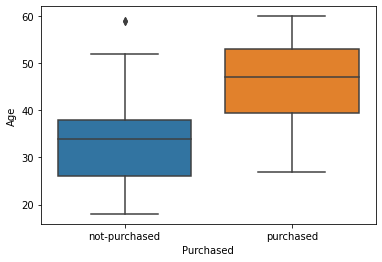

In [114]:
sns.boxplot(x='Purchased',y='Age',data=data);

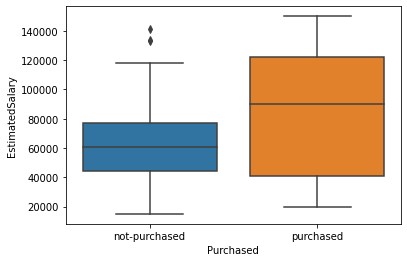

In [115]:
sns.boxplot(x='Purchased', y='EstimatedSalary', data=data);

DATA PREPROCESSING

In [116]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [117]:
from sklearn import preprocessing

lee = preprocessing.LabelEncoder()
lee.fit(data['Purchased'])
data['Purchased'] = lee.transform(data['Purchased'])

In [118]:
y = data['Purchased']
data = data.drop(columns=['Purchased'], axis=1)
data

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [119]:
data = pd.get_dummies(data)
data

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,1,0
3,15603246,27,57000,1,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,0,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.93657932, -1.78179743, -1.49004624, -1.02020406,  1.02020406],
       [ 1.66838653, -0.25358736, -1.46068138, -1.02020406,  1.02020406],
       [-0.32087714, -1.11320552, -0.78528968,  0.98019606, -0.98019606],
       ...,
       [-0.52039175,  1.17910958, -1.46068138,  0.98019606, -0.98019606],
       [ 0.88695546, -0.15807423, -1.07893824, -1.02020406,  1.02020406],
       [-1.36231017,  1.08359645, -0.99084367,  0.98019606, -0.98019606]])

MODEL BUILDING

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test = train_test_split(data,y, test_size=0.3,random_state=0)

In [124]:
print(x_train.shape)
print(x_test.shape)

(280, 5)
(120, 5)


In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
cif = LogisticRegression()
cif.fit(x_train,y_train)

LogisticRegression()

In [127]:
prediction = cif.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [129]:
from sklearn.metrics import roc_auc_score


In [130]:
score = roc_auc_score(y_test,prediction)

In [131]:
score

0.8527323247916023

naive bayes model

In [132]:
from sklearn.naive_bayes import GaussianNB

In [135]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

GaussianNB()

In [136]:
nb_pred = nb.predict(x_test)
nb_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [138]:
score2 = roc_auc_score(y_test,nb_pred)

In [139]:
score2

0.883451682618092

REGRESSION

In [ ]:
data = pd.read_csv('.csv')
data.head()